## Connecting to Python to Visualize data 
SQL is a powerful tool that can be used analysis. In most business cases, you will want to connect your SQL database to some sort of visualization tool, some of the options include.
- [Metabase](https://www.metabase.com/)
- [Grafana](https://grafana.com/)
- [Looker Studio](https://lookerstudio.google.com/)
- [Power BI](https://www.microsoft.com/en-us/power-platform/products/power-bi)

The above tools allow us to build dashboard for making the insights of our SQL queries clearer. These platforms allow us to connect our databases and run queries on the platforms, but even though we have the ability to run queries, another option is to use views created in our database so that we just call the views and create the visualizations as required.

For this example, we will just use plain old Matplotlib to visualize data just to show that we are able to connect to our database and make use of our views.

*If you plan on running the queries, please make sure that you have created the database and views that are being used, otherwise this notebook should be used hand in hand with SQL noteboook*

In [1]:
import psycopg2 
import pandas as pd 
import matplotlib.pyplot as plt

### Connect to the database

Set up the database connection

In [2]:
database = 'movie_rental'
user = 'postgres'
password = 'superstrongpassword'
host = 'localhost'
port = '5432'

conn = psycopg2.connect(database=database, user=user, password=password, host=host, port=port)

### Create the DataFrames

Create the DataFrames for each view using the `read_sql` method

In [ ]:
total_inventory_per_film = pd.read_sql("SELECT * FROM total_inventory_per_film", conn)
total_inventory_and_total_rental_per_film = pd.read_sql("SELECT * FROM total_inventory_and_total_rental_per_film", conn)
return_window_spread = pd.read_sql("SELECT * FROM return_window_spread", conn)
repeat_overdue_offenders = pd.read_sql("SELECT * FROM repeat_overdue_offenders", conn)
customers_with_overdue_and_no_return = pd.read_sql("SELECT * FROM customers_with_overdue_and_no_return", conn)
best_rental_month = pd.read_sql("SELECT * FROM best_rental_month", conn)

## Compare Inventory and Movies Rented Out.

Looking to see what our stock level look like for the different films and trying to see if we are well stocked based on the frequency that each film is being rented out.

Looking at the scatter plot, we can see that the films with a higher inventory are also the films that are rented out the most, so we can conclude that the inventory levels for each film aligns with the frequency at it is rented out with no outliers

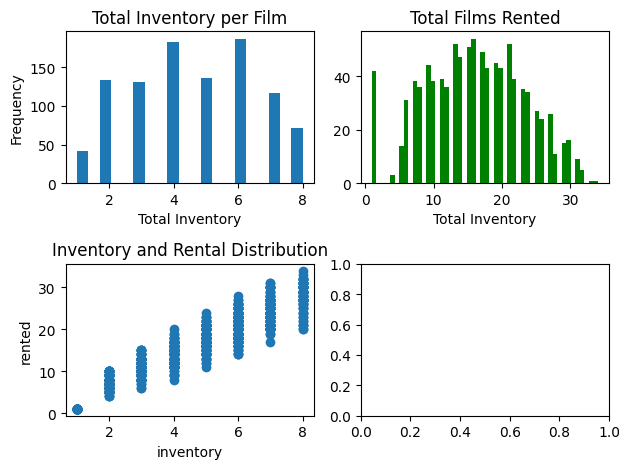

In [65]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].hist(total_inventory_and_total_rental_per_film["total_inventory"], bins=20)
ax[0, 0].set_title("Total Inventory per Film")
ax[0, 0].set_xlabel("Total Inventory")
ax[0, 0].set_ylabel("Frequency")

ax[0, 1].hist(total_inventory_and_total_rental_per_film["total_rented_out"], bins=50, color="green")
ax[0, 1].set_title("Total Films Rented")
ax[0, 1].set_xlabel("Total Inventory")

ax[1, 0].scatter(total_inventory_and_total_rental_per_film["total_inventory"], 
                 total_inventory_and_total_rental_per_film["total_rented_out"])
ax[1, 0].set_title("Inventory and Rental Distribution")
ax[1, 0].set_xlabel("inventory")
ax[1, 0].set_ylabel("rented")
plt.tight_layout()
plt.show()

## Overdue VS On-time VS Not Returned

Taking a look at how often films are returned on time and overdue and how many films have not been returned.

We can see that our overdue films are really close to our on-time returns. If we decided to add a late fee, it would be good to compare the change in this value in the long run 

<BarContainer object of 3 artists>

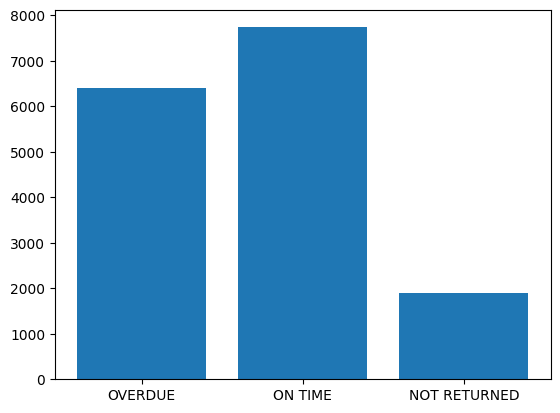

In [66]:
fig, ax = plt.subplots()

ax.bar(return_window_spread['return_status'], return_window_spread['total'])

## Overdue Frequency By Customers

Taking a look at how oten customers are repeat offenders when it comes to returning books late.

We can see that most of the offenders have offended quite a lot with the mean sitting at around 12. From this we can see that someone who doesn't return the film on time has a high likelyhood of offending again 

(array([ 3.,  3.,  0.,  3., 20.,  0., 39., 38.,  0., 55., 68.,  0., 69.,
        69.,  0., 68., 40.,  0., 48., 29.,  0., 17., 11.,  0.,  7.,  6.,
         0.,  1.,  2.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([ 2.        ,  2.65714286,  3.31428571,  3.97142857,  4.62857143,
         5.28571429,  5.94285714,  6.6       ,  7.25714286,  7.91428571,
         8.57142857,  9.22857143,  9.88571429, 10.54285714, 11.2       ,
        11.85714286, 12.51428571, 13.17142857, 13.82857143, 14.48571429,
        15.14285714, 15.8       , 16.45714286, 17.11428571, 17.77142857,
        18.42857143, 19.08571429, 19.74285714, 20.4       , 21.05714286,
        21.71428571, 22.37142857, 23.02857143, 23.68571429, 24.34285714,
        25.        ]),
 <BarContainer object of 35 artists>)

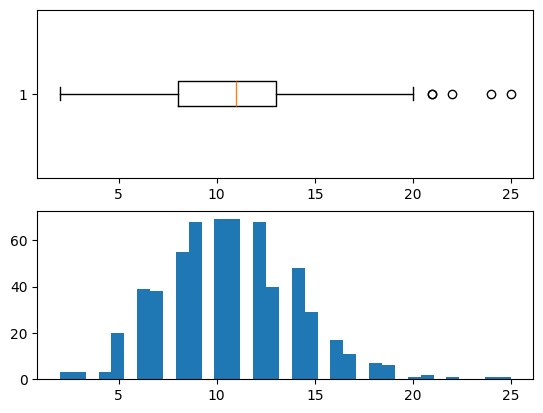

In [8]:
fig, ax = plt.subplots(2, 1)

ax[0].boxplot(repeat_overdue_offenders['total_overdue_rentals'], vert=False )
ax[1].hist(repeat_overdue_offenders['total_overdue_rentals'], bins=35)

## Are Frequently Overdue Customers also non-returners

Looking to see if a person who consistently returns books late also doesn't return books shows that people who frequently return films late have a high chance of not returning films completely, but it also shows that just because someone frequently returns films late, it does not mean they don't return more than anyone else

C:\Users\BonganiBG\AppData\Local\Temp\ipykernel_10648\1513981793.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["full_name"], rotation=90)


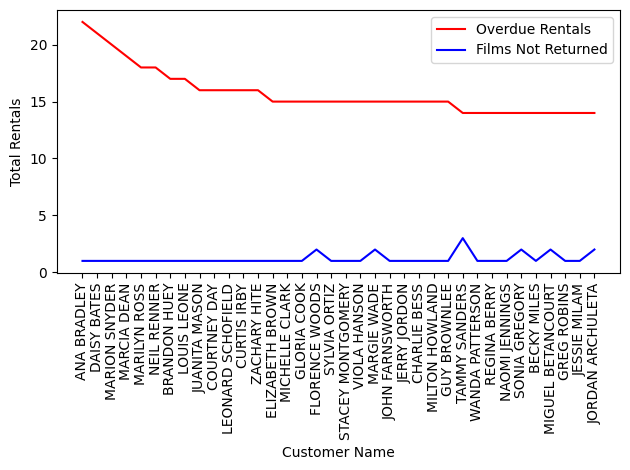

In [104]:
fig, ax = plt.subplots()
df = customers_with_overdue_and_no_return.loc[customers_with_overdue_and_no_return['total_overdue_rentals'] > 13]

ax.plot(df['full_name'], df['total_overdue_rentals'], color='red')
ax.plot(df['full_name'], df['total_non_returnals'], color='blue')
ax.set_xticklabels(df["full_name"], rotation=90)
ax.set_xlabel('Customer Name')
ax.set_ylabel('Total Rentals')
ax.legend(['Overdue Rentals', 'Films Not Returned'])

plt.tight_layout()


### Best Month for Rentals

Taking a look at which months are the best sales wise for retnals, we can see that the volume of rentals and the money made in the months is consistent and we can see that there is a huge spike from the 6th month to the 7th month and 8th month.


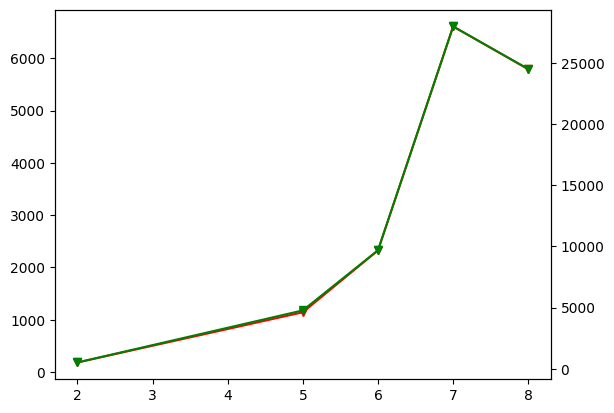

In [4]:
df = best_rental_month

fig, ax = plt.subplots()

ax.plot(df['month'], df['total_rentals'], color='red', marker="v")
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df['month'], df['total_earnings'], color='green', marker="v")